In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


# 0129

# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

Sequential([Flatten(), Dense(64)])

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
# Print the model summary
model.weights

ValueError: Weights for model sequential have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

- model.weights는 model의 input shape이 지정되지 않은 채 호출하면 에러가 난다.
- model의 input shape을 입력해줄 때는 Flatten 층을 사용하면 된다.
- model의 input shape을 지정해준 후 model.weights를 실행하면 초기화된 weights를 볼 수 있다.

In [5]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-0.0650277 ,  0.07807954,  0.06764354, ...,  0.00652854,
         -0.05637303,  0.00596736],
        [-0.0042644 ,  0.00158584, -0.00260895, ...,  0.0761317 ,
         -0.0142888 , -0.01683686],
        [-0.03792803,  0.03108539,  0.01594734, ..., -0.04934676,
          0.00375046, -0.02559318],
        ...,
        [-0.02132875,  0.01411453, -0.08265388, ..., -0.04310441,
         -0.04600396, -0.06125903],
        [-0.00911707, -0.04432638,  0.00119944, ...,  0.02903779,
          0.01528352, -0.08365975],
        [-0.04809976, -0.00607476,  0.08067831, ...,  0.07138084,
          0.00350781, -0.03302382]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_4/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[-3.40135098e-01, -3.16406101e-01, -8.69231224

- model.summary을 통해 model의 요약을 볼 수 있다.

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


- 아래와 같이 softmax를 활성함수로 사용하지 않고, Softmax 층으로 나눌 수도 있다.

In [7]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10),
    Softmax()
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


- name="layer_1"과 같은 옵션을 통해 각 층의 이름을 지을 수도 있다.
- 활성함수로 sigmoid나 tanh를 사용할 때에는 activation='sigmoid', activation='tanh'와 같이 입력하면 된다.

In [12]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu', name="layer_1"),
    Dense(16, activation='sigmoid'),
    Dense(10),
    Softmax()
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                170       
_________________________________________________________________
softmax_4 (Softmax)          (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

- 모델에서 tensor shape이 (None, 30, 30, 16)과 같은 형태로 나오는데 가장 앞의 None은 batch size를 의미한다.
- Conv2D 층에서 padding='SAME'으로 옵션을 줄 경우, output의 사이즈가 input 사이즈와 동일하게 유지된다.
- kernel_size나 pool_size는 pytorch를 사용할 때와 마찬가지로 정사각 kernel을 사용할 경우 (2, 2) 대신 2와 같은 정수를 입력해주어도 된다.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation='softmax'),
])

In [18]:
# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


- padding='SAME' 옵션을 주면 아래와 같이 padding을 통해 output shape이 input shape과 동일하게 출력되도록 맞춰준다.

In [20]:
model = Sequential([
    Conv2D(16, (3, 3), padding='SAME', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1296)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12970     
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


In [ ]:
- strides=2로 옵션을 주면, 보폭을 2칸씩 이동하게 되므로 output의 dimension이 축소되는 효과를 볼 수 있다.

In [21]:
model = Sequential([
    Conv2D(16, (3, 3), padding='SAME', strides=2, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


- data_format 옵션의 default 값은 channels_last로 input_shape을 입력할 때 channel 크기를 마지막에 입력하면 되지만,
data_format="channels_first"로 옵션을 줄 경우 input_shpae을 입력할 때 channel 크기를 앞에 입력해야 한다.
- 이렇게 할 경우 풀링층에도 data_format 옵션을 동일하게 주어야 한다.

In [23]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(1, 28, 28), data_format="channels_first"),
    MaxPooling2D((3, 3), data_format="channels_first"),
    Flatten(),
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 16, 26, 26)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 8, 8)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


# 02/01

- 아래에서 나오는 내용은 모델의 은닉층을 생성할 때 각 층의 가중치 및 편향을 어떻게 초기화할지에 대한 내용이다.
- 가중치를 초기화할 때 다양한 정규분포를 사용하여 가중치를 초기화할 수 있다.
- 그러나 인공지능 강의에서 배웠듯이, 현재는 가중치 초기화에 큰 비중을 두고 있지 않으므로, 
아래의 내용은 가볍게 읽어보면 될 것 같다.

# Weight and bias initialisers 

In this reading we investigate different ways to initialise weights and biases in the layers of neural networks.

In [1]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
print(tf.__version__)

2.0.0


### Default weights and biases

In the models we have worked with so far, we have not specified the initial values of the weights and biases in each layer of our neural networks.

The default values of the weights and biases in TensorFlow depend on the type of layers we are using. 

For example, in a `Dense` layer, the biases are set to zero (`zeros`) by default, while the weights are set according to `glorot_uniform`, the Glorot uniform initialiser. 

The Glorot uniform initialiser draws the weights uniformly at random from the closed interval $[-c,c]$, where $$c = \sqrt{\frac{6}{n_{input}+n_{output}}}$$


and $n_{input}$ and $n_{output}$ are the number of inputs to, and outputs from the layer respectively.

### Initialising your own weights and biases
We often would like to initialise our own weights and biases, and TensorFlow makes this process quite straightforward.

When we construct a model in TensorFlow, each layer has optional arguments `kernel_initialiser` and `bias_initialiser`, which are used to set the weights and biases respectively.

If a layer has no weights or biases (e.g. it is a max pooling layer), then trying to set either `kernel_initialiser` or `bias_initialiser` will throw an error.

Let's see an example, which uses some of the different initialisations available in Keras.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D 

#Constructing a model

model = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), kernel_initializer='random_uniform', bias_initializer="zeros", activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu'),
])

As the following example illustrates, we can also instantiate initialisers in a slightly different manner, allowing us to set optional arguments of the initialisation method.

In [4]:
#Adding some layers to our model
model.add(Dense(64, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'),)

model.add(Dense(8, 
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))

### Custom weight and bias initialisers
It is also possible to define your own weight and bias initialisers.
Initializers must take in two arguments, the `shape` of the tensor to be initialised, and its `dtype`.

Here is a small example, which also shows how you can use your custom initializer in a layer.


In [5]:
import tensorflow.keras.backend as K

#Example of a custom initializer
def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)

model.add(Dense(64, kernel_initializer=my_init))

Let's take a look at the summary of our finalised model.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 16)           3088      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 31, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 496)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                31808     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                5

### Visualising the initialised weights and biases

Finally, we can see the effect of our initialisers on the weights and biases by plotting histograms of the resulting values. Compare these plots with the selected initialisers for each layer above.

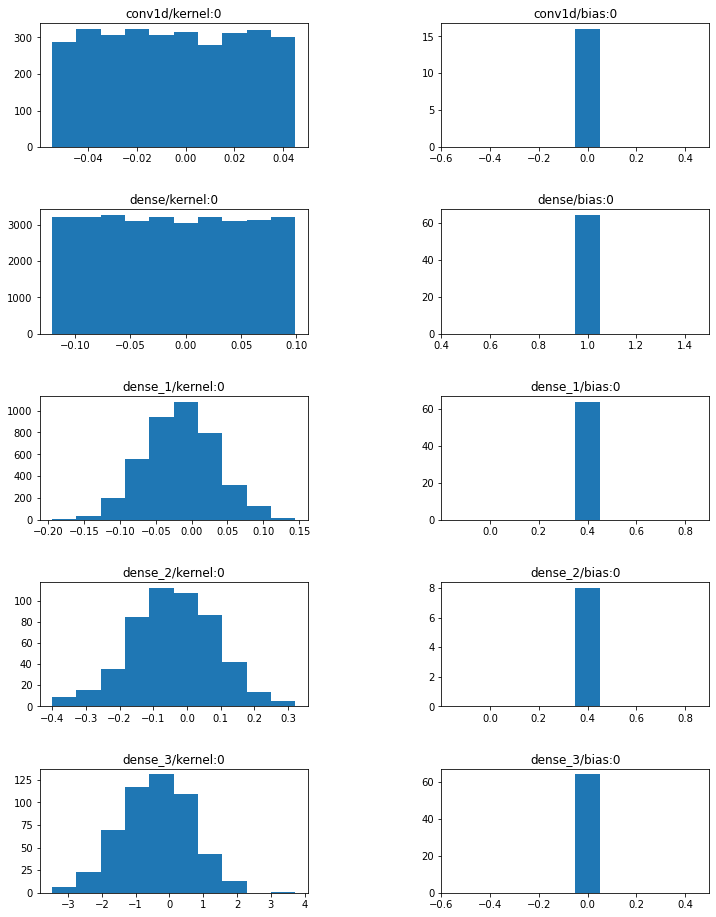

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in model.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

## Further reading and resources 
* https://keras.io/initializers/
* https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/initializers

# 02/02

***
<a id="coding_tutorial_3"></a>
## The compile method

- model.compile 메서드를 통해 optimizer와 loss를 설정할 수 있다.
- metrics에 아래와 같은 인자를 지정하면, 추적을 원하는 인자들도 구할 수 있다.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(32,)),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='sgd', # 'adam', 'rmsprop', 'adadelta'도 가능
    loss='binary_crossentropy', # 'mean_squared_error', 'categorical_crossentropy'도 가능
    metrics=['accuracy', 'mae'] # mae: mean absolute error
)

- model.compile 내에 string 형태로 참조 선언해주는 대신에, 아래와 같이 직접 객체를 선언해줄 수도 있다.
- 아래에서 BinaryCrossentropy의 옵션인 from_logits=True로 지정해줄 경우, model의 output 층을 정의할 때 활성 함수를 
linear로 지정해주어야 한다.
- from_logits 옵션은 모델에서 linear한 값을 output으로 받는다는 의미이므로, linear한 output을 loss에 입력할 때
sigmoid를 적용해준다.
- 이렇게 하는 것이 모델의 층에서 activation='sigmoid'로 지정한 후 from_logits 옵션을 사용하지 않는 것과 계산은 동일하지만, 
수학 연산 측면에서 좀 더 안정적인 접근이라고 한다.
- BinaryAccuracy의 threshold 옵션은 모델의 출력 결과가 positive일 확률에 대한 임계값을 지정해주는 옵션이다.

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.7), tf.keras.metrics.MeanAbsoluteError()]
)

#### Compile the model

In [3]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(1, 28, 28), data_format="channels_first"),
    MaxPooling2D((3, 3), data_format="channels_first"),
    Flatten(),
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 26, 26)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 8, 8)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', # categorical_crossentropy
             metrics=['accuracy']) # mae

In [6]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy


- optimizer의 세부 옵션을 직접 설정하고 싶을 때에는 다음과 같이 optimizer 객체를 선언하고
이를 model.compile 메서드에 입력해주어도 된다.
- accuracy나 mae의 경우에도 객체를 선언할 수 있다.

In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy', # categorical_crossentropy
             metrics=[acc, mae]) # mae
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x000001D4E9E79848>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x000001D4E9E79888>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


# Metrics in Keras
In this reading we will be exploring the different metrics in Keras that may be used to judge the performance of a model.

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow.keras.backend as K
print(tf.__version__)

2.0.0


One of the most common metrics used for classification problems in Keras is `'accuracy'`. 

We will begin with a simple example of a model that uses accuracy as a metric.

In [11]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

We now have a model that uses accuracy as a metric to judge its performance.

But how is this metric actually calculated? We will break our discussion into two cases.


### Case 1 - Binary Classification with sigmoid activation function
Suppose we are training a model for a binary classification problem with a sigmoid activation function (softmax activation functions are covered in the next case). 

Given a training example with input $x^{(i)}$, the model will output a float between 0 and 1. Based on whether this float is less than or greater than our "threshold" (which by default is set at 0.5), we round the float to get the predicted classification $y_{pred}$ from the model.

The accuracy metric compares the value of $y_{pred}$ on each training example with the true output, the one-hot coded vector $y_{true}^{(i)}$ from our training data.

Let $$\delta(y_{pred}^{(i)},y_{true}^{(i)}) = \begin{cases} 1 & y_{pred}=y_{true}\\
0 & y_{pred}\neq y_{true} \end{cases}$$

The accuracy metric  computes the mean of $\delta(y_{pred}^{(i)},y_{true}^{(i)})$ over all training examples.

$$ accuracy = \frac{1}{N} \sum_{i=1}^N \delta(y_{pred}^{(i)},y_{true}^{(i)}) $$

This is implemented in the backend of Keras as follows. 
Note: We have set $y_{true}$ and $y_{pred}$ ourselves for the purposes of this example.

- 아래의 코드에서 y_pred는 sigmoid를 거쳐서 나온 output이라고 가정한다.
- metrics에서 accuracy를 계산할 때에는 y_pred을 threshold에 따라 0, 1의 값으로 바꾼 후, 
y_true와 비교하는 방식을 사용한다.
- 이를 통해 계산한 accuracy는 0.6666667이 되고, 이와 같은 방식으로 metrics의 accuracy가 계산된다.

In [ ]:
# Sigmoid activation function
y_true = tf.constant([0.0, 1.0, 1.0])
y_pred = tf.constant([0.4, 0.8, 0.3])
accuracy = K.mean(K.equal(y_true, K.round(y_pred)))
accuracy

### Case 2 - Categorical Classification
Now suppose we are training a model for a classification problem which should sort data into $m>2$ different classes using a softmax activation function in the last layer.

Given a training example with input $x^{(i)}$, the model will output a tensor of probabilities $p_1, p_2, \dots p_m$, giving the likelihood (according to the model) that $x^{(i)}$ falls into each class.

The accuracy metric works by determining the largest argument in the $y_{pred}^{(i)}$ tensor, and compares its index to the index of the maximum value of $y_{true}^{(i)}$ to determine $\delta(y_{pred}^{(i)},y_{true}^{(i)})$. It then computes the accuracy in the same way as for the binary classification case.

$$ accuracy = \frac{1}{N} \sum_{i=1}^N \delta(y_{pred}^{(i)},y_{true}^{(i)}) $$

In the backend of Keras, the accuracy metric is implemented slightly differently depending on whether we have a binary classification problem ($m=2$) or a categorical classifcation problem. Note that the accuracy for binary classification problems is the same, no matter if we use a sigmoid or softmax activation function to obtain the output.


- Binary classification이나 Categorical classification의 경우에도 동일한 방법으로 accuracy가 계산된다.

In [13]:
# Binary classification with softmax
y_true = tf.constant([[0.0,1.0],[1.0,0.0],[1.0,0.0],[0.0,1.0]])
y_pred = tf.constant([[0.4,0.6],[0.3,0.7],[0.05,0.95],[0.33,0.67]])
accuracy =K.mean(K.equal(y_true, K.round(y_pred)))
accuracy

<tf.Tensor: id=708, shape=(), dtype=float32, numpy=0.5>

In [15]:
# Categorical classification with m>2
y_true = tf.constant([[0.0,1.0,0.0,0.0],[1.0,0.0,0.0,0.0],[0.0,0.0,1.0,0.0]])
y_pred = tf.constant([[0.4,0.6,0.0,0.0],[0.3,0.2,0.1,0.4],[0.05,0.35,0.5,0.1]])
# K.argmax 는 최대값에 해당하는 element의 index를 리턴한다.
accuracy = K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)))
accuracy

tf.Tensor([1 0 2], shape=(3,), dtype=int64)


<tf.Tensor: id=730, shape=(), dtype=float32, numpy=0.6666667>

## Other examples of metrics
We will now look at some other metrics in Keras. A full list is available at <https://keras.io/metrics/>.

### Binary accuracy and categorical accuracy
The `binary_accuracy` and `categorical_accuracy` metrics are, by default, identical to the Case 1 and 2 respectively of the `accuracy` metric explained above. 

However, using `binary_accuracy` allows you to use the optional `threshold` argument, which sets the minimum value of $y_{pred}$ which will be rounded to 1. As mentioned above, it is set as `threshold=0.5` by default.

Below we give some examples of how to compile a model with `binary_accuracy` with and without a threshold.

In [ ]:
- 아래의 두 코드는 동일한 코드이다.
- threshold를 통해 accuracy의 임계값을 설정할 수 있다.

In [16]:
# Compile the model with default threshold (=0.5)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['binary_accuracy'])

# The threshold can be specified as follows
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)])

### Sparse categorical accuracy

This is a very similar metric to categorical accuracy with one major difference - the label $y_{true}$ of each training example is not expected to be a one-hot encoded vector, but to be a tensor consisting of a single integer. This integer is then compared to the index of the maximum argument of $y_{pred}$ to determine $\delta(y_{pred}^{(i)},y_{true}^{(i)})$.
- sparse categorical accuracy는 $y_{true}$가 원핫코드가 아닌 정수 형태일 때 사용하는 metrics라고 한다.

In [17]:
#Two examples of compiling a model with 
#a sparse categorical accuracy metric.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["sparse_categorical_accuracy"])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

### (Sparse) Top $k$-categorical accuracy 
In top $k$-categorical accuracy, instead of computing how often the model correctly predicts the label of a training example, the metric computes how often the model has $y_{true}$ in the top $k$ of its predictions. By default, $k=5$.

As before, the main difference between top $k$-categorical accuracy and its sparse version is that the former assumes $y_{true}$ is a one-hot encoded vector, whereas the sparse version assumes $y_{true}$ is an integer.

In [18]:
# Compile a model with a top-k categorical accuracy metric with default k (=5)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["top_k_categorical_accuracy"])
# Specify k instead with the sparse top-k categorical accuracy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3)])

## Custom metrics
It is also possible to define your own custom metric in Keras.
You will need to make sure that your metric takes in (at least) two arguments called `y_true` and `y_pred` and then output a single tensor value.

In [ ]:
# Define a custom metric
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

# Specify k instead with the sparse top-k categorical accuracy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[mean_pred])

## Multiple metrics
Finally, it is possible to use multiple metrics to judge the performance of your model. 


Here's an example:

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              # 아래와 같이 여러 개의 metrics를 사용할 수도 있다.
              metrics=[mean_pred, "accuracy", tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3)])

### Sources and Further Reading
* The metrics page on the Keras website: https://keras.io/metrics/
* The source code for the metrics: https://github.com/keras-team/keras/blob/master/keras/metrics.py


***
<a id="coding_tutorial_4"></a>
## The fit method

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [ ]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [ ]:
# Print the shape of the training data



In [ ]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [ ]:
# Rescale the image values so that they lie in between 0 and 1.



In [ ]:
# Display one of the images



#### Fit the model

In [ ]:
# Fit the model



#### Plot training history

In [ ]:
# Load the history into a pandas Dataframe



In [ ]:
# Make a plot for the loss



In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model



#### Make predictions from the model

In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

